In [1]:
import sys
sys.path.append('../..')

from nn import Model
from nn.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNorm2D
from nn.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

np.set_printoptions(precision=3)
np.random.seed(1)

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = np.transpose(X_train, (0, 3, 1, 2))
X_train = X_train[:4000] / 255
y_train = y_train.reshape((-1))[:10000]

In [3]:
regular = Model()
regular.add(Conv2D(10, kernel_size=(2, 2), activation='relu', input_shape=(3, 32, 32)))
regular.add(MaxPooling2D(pool_size=(2, 2)))
regular.add(Conv2D(10, (2, 2), activation='relu'))
regular.add(MaxPooling2D(pool_size=(2, 2)))
regular.add(Flatten())
regular.add(Dense(10, activation='softmax'))
regular.compile(Adam(learning_rate=0.01, beta1=0.9, beta2=0.9))
regular.fit(X_train, y_train, epochs=20, batch_size=32, verbose=True)

Epoch 1/20
4000/4000 - loss: 2.3737 - accuracy: 0.1348
Epoch 2/20
4000/4000 - loss: 2.2062 - accuracy: 0.1675
Epoch 3/20
4000/4000 - loss: 2.1216 - accuracy: 0.2170
Epoch 4/20
4000/4000 - loss: 2.0721 - accuracy: 0.2387
Epoch 5/20
4000/4000 - loss: 2.0178 - accuracy: 0.2695
Epoch 6/20
4000/4000 - loss: 1.9873 - accuracy: 0.2833
Epoch 7/20
4000/4000 - loss: 1.9707 - accuracy: 0.2908
Epoch 8/20
4000/4000 - loss: 1.9311 - accuracy: 0.3028
Epoch 9/20
4000/4000 - loss: 1.8941 - accuracy: 0.3197
Epoch 10/20
4000/4000 - loss: 1.8440 - accuracy: 0.3443
Epoch 11/20
4000/4000 - loss: 1.7985 - accuracy: 0.3575
Epoch 12/20
4000/4000 - loss: 1.7697 - accuracy: 0.3715
Epoch 13/20
4000/4000 - loss: 1.7376 - accuracy: 0.3957
Epoch 14/20
4000/4000 - loss: 1.6869 - accuracy: 0.4047
Epoch 15/20
4000/4000 - loss: 1.6972 - accuracy: 0.4045
Epoch 16/20
4000/4000 - loss: 1.6549 - accuracy: 0.4123
Epoch 17/20
4000/4000 - loss: 1.6431 - accuracy: 0.4280
Epoch 18/20
4000/4000 - loss: 1.6300 - accuracy: 0.4290
E

In [4]:
batch_norm = Model()
batch_norm.add(Conv2D(10, kernel_size=(2, 2), activation='sigmoid', input_shape=(3, 32, 32)))
batch_norm.add(MaxPooling2D(pool_size=(2, 2)))
batch_norm.add(BatchNorm2D())
batch_norm.add(Conv2D(10, (2, 2), activation='sigmoid'))
batch_norm.add(MaxPooling2D(pool_size=(2, 2)))
batch_norm.add(BatchNorm2D())
batch_norm.add(Flatten())
batch_norm.add(Dense(10, activation='softmax'))
batch_norm.compile(Adam(learning_rate=0.01, beta1=0.9, beta2=0.9))
batch_norm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=True)

Epoch 1/20
4000/4000 - loss: 14.4135 - accuracy: 0.1943
Epoch 2/20
4000/4000 - loss: 2.9222 - accuracy: 0.2395
Epoch 3/20
4000/4000 - loss: 1.8612 - accuracy: 0.3438
Epoch 4/20
4000/4000 - loss: 1.7614 - accuracy: 0.3810
Epoch 5/20
4000/4000 - loss: 1.7056 - accuracy: 0.4010
Epoch 6/20
4000/4000 - loss: 1.6678 - accuracy: 0.4188
Epoch 7/20
4000/4000 - loss: 1.6851 - accuracy: 0.4095
Epoch 8/20
4000/4000 - loss: 1.6302 - accuracy: 0.4303
Epoch 9/20
4000/4000 - loss: 1.6187 - accuracy: 0.4355
Epoch 10/20
4000/4000 - loss: 1.5853 - accuracy: 0.4447
Epoch 11/20
4000/4000 - loss: 1.5703 - accuracy: 0.4565
Epoch 12/20
4000/4000 - loss: 1.5307 - accuracy: 0.4657
Epoch 13/20
4000/4000 - loss: 1.4961 - accuracy: 0.4855
Epoch 14/20
4000/4000 - loss: 1.4682 - accuracy: 0.4913
Epoch 15/20
4000/4000 - loss: 1.4545 - accuracy: 0.5028
Epoch 16/20
4000/4000 - loss: 1.4411 - accuracy: 0.5030
Epoch 17/20
4000/4000 - loss: 1.4026 - accuracy: 0.5198
Epoch 18/20
4000/4000 - loss: 1.3853 - accuracy: 0.5292


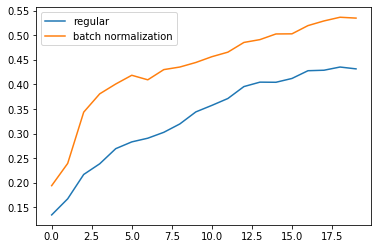

In [5]:
plt.plot(regular.scores['acc'])
plt.plot(batch_norm.scores['acc'])
plt.legend(['regular', 'batch normalization'])
plt.show()